In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
dataset = pd.read_csv("C:\\Users\\User\\Desktop\\Spring'24\\CSE465 Project\\Dataset\\train.csv")
df = dataset
dataset.head()

,sentence,target,type,hate speech
0,.... ঐ ইন্দুর তোই মরছ নাই?,ind,callToViolence,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,ind,callToViolence,1
2,✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,ind,callToViolence,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...,female,callToViolence,1
4,২য় মীর জাফরের মুখে মুতে দে...,male,callToViolence,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40224 entries, 0 to 40223
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentence     40224 non-null  object
 1   target       19324 non-null  object
 2   type         19324 non-null  object
 3   hate speech  40224 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [4]:
df.shape

(40224, 4)

In [5]:
df = df.drop('target',axis=1)

In [6]:
df = df.drop('type', axis=1)

In [7]:
df.isnull().sum()

sentence       0
hate speech    0
dtype: int64

In [8]:
df

,sentence,hate speech
0,.... ঐ ইন্দুর তোই মরছ নাই?,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,1
2,✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...,1
4,২য় মীর জাফরের মুখে মুতে দে...,1
...,...,...
40219,��� গানটা চালু করে ওয়াস রুমে গিয়েছিলাম! এসে দে...,0
40220,���� হালকার উপজেলা ঝাপসা,0
40221,���� ��,0
40222,���� ��পুরাই আগুনের গুলা� () ��,0


In [9]:
df.columns

Index(['sentence', 'hate speech'], dtype='object')

In [10]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('---'*20)

sentence
['.... ঐ ইন্দুর তোই মরছ নাই?'
 '#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আমি মহাখুশী ✌✌আপনি তো হ র হ র করে বমি করবেন নাকি আমাদের দেখলে� আমরা না হয় মূত্রত্যাগেই আপনাকে দিব #গু দক্ষিনা'
 '✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।' ... '���� ��'
 '���� ��পুরাই আগুনের গুলা� () ��' '������� মজা পাইলাম �����']
------------------------------------------------------------
hate speech
[1 0]
------------------------------------------------------------


In [11]:
df['hate speech'].value_counts()

hate speech
0    20900
1    19324
Name: count, dtype: int64

<Axes: xlabel='hate speech', ylabel='count'>

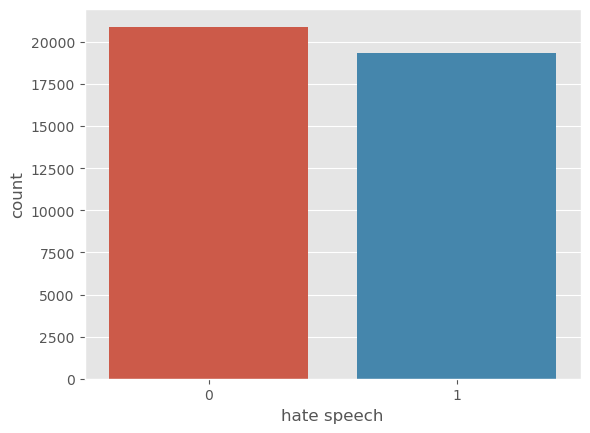

In [12]:
sns.countplot(data=df, x='hate speech')

In [13]:
print(df['sentence'].iloc[0],"\n")
print(df['sentence'].iloc[1],"\n")
print(df['sentence'].iloc[2],"\n")
print(df['sentence'].iloc[3],"\n")
print(df['sentence'].iloc[4],"\n")

.... ঐ ইন্দুর তোই মরছ নাই? 

#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আমি মহাখুশী ✌✌আপনি তো হ র হ র করে বমি করবেন নাকি আমাদের দেখলে� আমরা না হয় মূত্রত্যাগেই আপনাকে দিব #গু দক্ষিনা 

✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।। 

১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাবে মিথিলা 

২য় মীর জাফরের মুখে মুতে দে... 



In [14]:
# def data_processing(sentence):
#     sentence = sentence.lower()
#     sentence = re.sub(r"https\S+|www\S+http\S+", '', sentence, flags = re.MULTILINE)
#     sentence = re.sub(r'\@w+|\#','', sentence)
#     sentence = re.sub(r'[^\w\s]','',sentence)
#     sentence = re.sub(r'ð','',sentence)
#     # tweet_tokens = word_tokenize(sentence)
#     filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
#     return " ".join(filtered_tweets)

In [15]:
# from bnlp import BasicTokenizer
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import nltk

# def data_processing(sentence):
#     # Convert the sentence to lowercase
#     sentence = sentence.lower()
    
#     # Remove URLs
#     sentence = re.sub(r"https?\S+|www\S+http\S+", '', sentence, flags=re.MULTILINE)
    
#     # Remove @ and # symbols
#     sentence = re.sub(r'\@\w+|\#', '', sentence)
    
#     # Remove non-Bangla characters and digits
#     sentence = re.sub(r'[^\u0980-\u09FF\s]', '', sentence)
    
#     # Remove special character ð
#     sentence = re.sub(r'ð', '', sentence)
    
#     # Remove extra whitespaces
#     sentence = re.sub(r'\s+', ' ', sentence)
    
#     # stop_words = set(stopwords.words('bengali'))
#     # tweet_tokens = word_tokenize(sentence)
#     # filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
#     # return " ".join(filtered_tweets)
    
#     return sentence

In [16]:
# from bnlp import BasicTokenizer
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import nltk
# import re

# def data_processing(sentence):
#     # Convert the sentence to lowercase
#     sentence = sentence.lower()
    
#     # Remove URLs
#     sentence = re.sub(r"https?\S+|www\S+http\S+", '', sentence, flags=re.MULTILINE)
    
#     # Remove @ and # symbols
#     sentence = re.sub(r'\@\w+|\#', '', sentence)
    
#     # Remove non-Bangla characters and digits
#     sentence = re.sub(r'[^\u0980-\u09FF\s]', '', sentence)
    
#     # Remove special character ð
#     sentence = re.sub(r'ð', '', sentence)
    
#     # Remove extra whitespaces
#     sentence = re.sub(r'\s+', ' ', sentence)
    
#     # Tokenize the sentence using NLTK's word_tokenize
#     tweet_tokens = word_tokenize(sentence)
    
#     # Load Bengali stop words
#     stop_words = set(stopwords.words('bengali'))
    
#     # Filter out stop words
#     filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    
#     # Join the tokens back into a sentence
#     return " ".join(filtered_tweets)


In [17]:
# from bnlp import BasicTokenizer
# import re
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import nltk

# # # Ensure that nltk is downloaded
# # nltk.download('punkt')
# # nltk.download('stopwords')

# def data_processing(sentence):
#     # Convert the sentence to lowercase
#     sentence = sentence.lower()
    
#     # Remove URLs
#     sentence = re.sub(r"https?\S+|www\S+http\S+", '', sentence, flags=re.MULTILINE)
    
#     # Remove @ and # symbols
#     sentence = re.sub(r'\@\w+|\#', '', sentence)
    
#     # Remove non-Bangla characters and digits
#     sentence = re.sub(r'[^\u0980-\u09FF\s]', '', sentence)
    
#     # Remove special character ð
#     sentence = re.sub(r'ð', '', sentence)
    
#     # Remove extra whitespaces
#     sentence = re.sub(r'\s+', ' ', sentence)
    
#     # Tokenize the sentence using NLTK's word_tokenize
#     tweet_tokens = word_tokenize(sentence)
    
#     # Load Bengali stop words
#     stop_words = set(stopwords.words('bengali'))
    
#     # Filter out stop words
#     filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    
#     # Join the tokens back into a sentence
#     return " ".join(filtered_tweets)

# # # Example usage
# # sentence = "আমি বাংলায় গান গাই।"
# # processed_text = data_processing(sentence)
# # print(processed_text)


In [18]:
# dataset.sentence = dataset['sentence'].apply(data_processing)

In [19]:
# from bnlp import BasicTokenizer
# tokenizer = BasicTokenizer()


# tokens = tokenizer.tokenize(sentence)


In [20]:
# from bnlp import BasicTokenizer
# from nltk.corpus import stopwords
# import pandas as pd

# # Initialize BasicTokenizer
# tokenizer = BasicTokenizer()

# # Load Bengali stop words
# stop_words = set(stopwords.words('bengali'))



# # Define your tokenization and stopword removal function
# def tokenize_and_remove_stopwords(sentence):
#     # Tokenize the sentence using BasicTokenizer
#     tokens = tokenizer.tokenize(sentence)
    
#     # Remove stopwords
#     tokens_without_stopwords = [token for token in tokens if token not in stop_words]
    
#     return tokens_without_stopwords

# # Tokenize the entire 'sentence' column and remove stopwords
# df['tokenized_sentence'] = df['sentence'].apply(tokenize_and_remove_stopwords)

# # Display the DataFrame with tokenized sentences
# print(df['tokenized_sentence'])


In [21]:
from bnlp import BasicTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

# Initialize BasicTokenizer
tokenizer = BasicTokenizer()

# Load Bengali stop words
stop_words = set(stopwords.words('bengali'))

# Define your preprocessing function
def preprocess_text(sentence):
    # Convert the sentence to lowercase
    sentence = sentence.lower()
    
    # Remove URLs
    sentence = re.sub(r"https?\S+|www\S+http\S+", '', sentence, flags=re.MULTILINE)
    
    # Remove @ and # symbols
    sentence = re.sub(r'\@\w+|\#', '', sentence)
    
    # Remove non-Bangla characters and digits
    sentence = re.sub(r'[^\u0980-\u09FF\s]', '', sentence)
    
    # Remove special character ð
    sentence = re.sub(r'ð', '', sentence)
    
    # Remove extra whitespaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    return sentence

# Define your tokenization and stopword removal function
def tokenize_and_remove_stopwords(sentence):
    # Tokenize the sentence using BasicTokenizer
    tokens = tokenizer.tokenize(sentence)
    
    # Remove stopwords
    tokens_without_stopwords = [token for token in tokens if token not in stop_words]
    
    return tokens_without_stopwords

# Preprocess the entire 'sentence' column
df['sentence'] = df['sentence'].apply(preprocess_text)

# Tokenize and remove stopwords from the preprocessed sentences
df['sentence'] = df['sentence'].apply(tokenize_and_remove_stopwords)

# Convert tokenized sentences back to strings for TfidfVectorizer
text = df['sentence'].apply(lambda x: ' '.join(x))

# Initialize TfidfVectorizer with n-grams range (1,2)
vect = TfidfVectorizer(ngram_range=(1,1)).fit(text)

# Transform the tokenized sentences to TF-IDF vectors
tfidf_matrix = vect.transform(text)

# Print the TF-IDF matrix shape
print(tfidf_matrix.shape)


(40224, 6518)


In [22]:
df['sentence']


0                                       [ইন্দুর, তোই, মরছ]
1        [গেবনের, শেষে, আইসা, মুখোশ, টা, খুলছে, এতেই, ম...
2                      [মুরগি, চোরের, পাছায়, ডুকবি, মারবি]
3        [১৮, কোটির, চোদা, খাওয়া, শেষে, ১৫০কোটির, চোদা,...
4                        [২য়, মীর, জাফরের, মুখে, মুতে, দে]
                               ...                        
40219    [গানটা, ওয়াস, রুমে, গিয়েছিলাম, দেখি, আব্বু, লে...
40220                              [হালকার, উপজেলা, ঝাপসা]
40221                                                   []
40222                                [পুরাই, আগুনের, গুলা]
40223                                        [মজা, পাইলাম]
Name: sentence, Length: 40224, dtype: object

In [23]:
# lemmatizer = WordNetLemmatizer()
# def lemmatizing(data):
#     sentence = [lemmatizer.lemmatize(word) for word in data]
#     return data

In [24]:
# dataset['sentence'] = dataset['sentence'].apply(lambda x: lemmatizing(x))

In [25]:
print(df['sentence'].iloc[0],"\n")
print(df['sentence'].iloc[1],"\n")
print(df['sentence'].iloc[2],"\n")
print(df['sentence'].iloc[3],"\n")
print(df['sentence'].iloc[4],"\n")

['ইন্দুর', 'তোই', 'মরছ'] 

['গেবনের', 'শেষে', 'আইসা', 'মুখোশ', 'টা', 'খুলছে', 'এতেই', 'মহাখুশী', 'হ', 'হ', 'বমি', 'দেখলে', 'মূত্রত্যাগেই', 'আপনাকে', 'দিব', 'গু', 'দক্ষিনা'] 

['মুরগি', 'চোরের', 'পাছায়', 'ডুকবি', 'মারবি'] 

['১৮', 'কোটির', 'চোদা', 'খাওয়া', 'শেষে', '১৫০কোটির', 'চোদা', 'খাবে', 'মিথিলা'] 

['২য়', 'মীর', 'জাফরের', 'মুখে', 'মুতে', 'দে'] 



In [26]:
# non_hate_tweets = dataset[dataset['hate speech'] == 0]
# non_hate_tweets.head()

In [27]:
df.isnull().sum()

sentence       0
hate speech    0
dtype: int64

In [28]:
# dataset.drop(dataset.isnull().index, inplace=True)

In [29]:
# dataset[dataset['target'].isnull()]

In [30]:
# dataset.drop(dataset[dataset['type'].isnull()].index, inplace=True)

In [31]:
df['hate speech'].value_counts()

hate speech
0    20900
1    19324
Name: count, dtype: int64

In [32]:
hate_tweets = df[df['hate speech'] == 1]
hate_tweets.head()

,sentence,hate speech
0,"[ইন্দুর, তোই, মরছ]",1
1,"[গেবনের, শেষে, আইসা, মুখোশ, টা, খুলছে, এতেই, ম...",1
2,"[মুরগি, চোরের, পাছায়, ডুকবি, মারবি]",1
3,"[১৮, কোটির, চোদা, খাওয়া, শেষে, ১৫০কোটির, চোদা,...",1
4,"[২য়, মীর, জাফরের, মুখে, মুতে, দে]",1


In [54]:
non_hate_tweets = df[df['hate speech'] == 0]
non_hate_tweets.head()

,sentence,hate speech
19324,"[ঃ, ভাইয়া, হাসতে, হাসতে, পেটে, ব্যথা, হয়ে]",0
19325,"[ঃ, রিফাত, বিশ্বাস, লোকটা, কেশুনছিলাম, রিফাতএখ...",0
19326,"[খালেদা, জিয়ার, ৩৯, তম, জন্মদিন, ১৯৭৫, সালের, ...",0
19327,"[মজা, পাইলাম, শেখ, হাসিনার, পা, চাটা, গোলাম]",0
19328,"[সময়, দেখেন, কুপানো, শেষ, তাকিয়ে, কোথায়, ্্্্]",0


In [34]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import pandas as pd

# # Assuming you have tokenized sentences stored in the 'tokenized_sentence' column of your DataFrame

# # Define your DataFrame

# df = pd.DataFrame(df['tokenized_sentence'])

# # Convert tokenized sentences back to string for TfidfVectorizer
# text = df['tokenized_sentence'].apply(lambda x: ' '.join(x))

# # Initialize TfidfVectorizer with n-grams range (1,2)
# vect = TfidfVectorizer(ngram_range=(1,2)).fit(text)

# # Transform the tokenized sentences to TF-IDF vectors
# tfidf_matrix = vect.transform(text)

# # Print the TF-IDF matrix shape
# print(tfidf_matrix.shape)


In [35]:
# vect = TfidfVectorizer(ngram_range=(1,2)).fit(df['tokenized_sentence'])

In [36]:
df.columns

Index(['sentence', 'hate speech'], dtype='object')

In [37]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 200 features: \n{}".format(feature_names[:200]))


Number of features: 6518

First 200 features: 
['অঅল' 'অআ' 'অআল' 'অই' 'অইখ' 'অইগ' 'অইছ' 'অইছত' 'অইট' 'অইদ' 'অইন' 'অইব'
 'অইল' 'অইশ' 'অইসব' 'অইসল' 'অউচ' 'অও' 'অওও' 'অওক' 'অওন' 'অক' 'অকট' 'অকথ'
 'অকর' 'অকল' 'অকলর' 'অখ' 'অখখম' 'অখন' 'অখল' 'অগ' 'অগচর' 'অগটন' 'অগণ' 'অগন'
 'অগর' 'অগল' 'অঘ' 'অঘটন' 'অঘটনও' 'অঙ' 'অঙস' 'অচ' 'অচক' 'অচল' 'অচলক' 'অচলপ'
 'অছ' 'অছমম' 'অজ' 'অজগ' 'অজজ' 'অজথ' 'অজধ' 'অজন' 'অজম' 'অঝ' 'অঝর' 'অঞ' 'অট'
 'অটল' 'অড' 'অডম' 'অণ' 'অত' 'অতএবত' 'অতচ' 'অতচয়' 'অতছ' 'অতট' 'অতন' 'অতপর'
 'অতব' 'অথ' 'অথচ' 'অথছ' 'অথব' 'অদ' 'অদভ' 'অদভদ' 'অদম' 'অধ' 'অধপত' 'অধপতন'
 'অধম' 'অধমতর' 'অধর' 'অন' 'অনইত' 'অনক' 'অনজ' 'অনতর' 'অনধ' 'অনন' 'অনপ'
 'অনবদ' 'অনবরত' 'অনর' 'অনরগল' 'অনল' 'অনশন' 'অনষ' 'অপ' 'অপক' 'অপকর' 'অপকরম'
 'অপচ' 'অপচয' 'অপচয়' 'অপছন' 'অপজ' 'অপট' 'অপত' 'অপদ' 'অপদস' 'অপন' 'অপপ'
 'অপপঅপপ' 'অপব' 'অপবব' 'অপভ' 'অপম' 'অপর' 'অপরক' 'অপরদ' 'অপরপক' 'অপশ'
 'অপশও' 'অপশক' 'অপশন' 'অপস' 'অপৱ' 'অফ' 'অফফফফফফফ' 'অফর' 'অফস' 'অব' 'অবইদ'
 'অবওস' 'অবক' 'অবগত' 'অবচত' 'অবজ' 'অবড' 'অবত' 'অবতল' 'অবদ' 'অবধ' 'অবনত'
 'অব

In [38]:
# Assuming you have defined feature_names and tfidf_matrix

# Get the TF-IDF vector for the first document
tfidf_vector = tfidf_matrix[0].toarray()[0]

# Print features along with their TF-IDF values for the first document
print("TF-IDF values for the first document:")
for feature_idx, feature_name in enumerate(feature_names):
    tfidf_value = tfidf_vector[feature_idx]  # Get TF-IDF value for the first document
    if tfidf_value != 0:
        print(f"Feature: {feature_name}, TF-IDF value: {tfidf_value}")


TF-IDF values for the first document:
Feature: ইন, TF-IDF value: 0.48591190440277
Feature: মরছ, TF-IDF value: 0.8740077923907048


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have already defined df, dataset, and vect

# Get tokenized sentences from DataFrame
tokenized_sentences = df['sentence']

# Convert tokenized sentences to strings
text_documents = [' '.join(tokens) for tokens in tokenized_sentences]

# Get labels from dataset DataFrame
Y = df['hate speech']

# Transform tokenized sentences into TF-IDF vectors
X = vect.transform(text_documents)


In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (32179, 6518)
Size of y_train: (32179,)
Size of x_test:  (8045, 6518)
Size of y_test:  (8045,)


In [42]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 67.30%


In [43]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[3218  912]
 [1719 2196]]


              precision    recall  f1-score   support

           0       0.65      0.78      0.71      4130
           1       0.71      0.56      0.63      3915

    accuracy                           0.67      8045
   macro avg       0.68      0.67      0.67      8045
weighted avg       0.68      0.67      0.67      8045



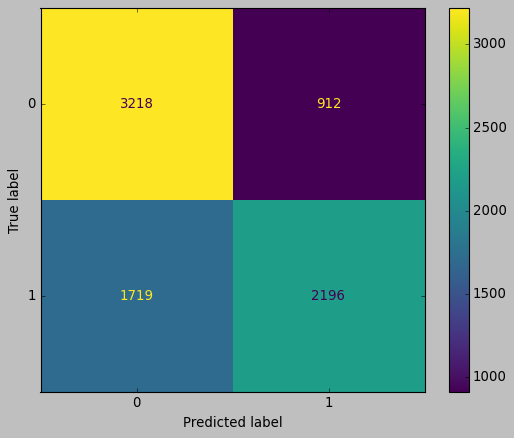

In [44]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [45]:
from sklearn.model_selection import GridSearchCV


In [46]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.69
Best parameters:  {'C': 1.0, 'solver': 'lbfgs'}


In [47]:
y_pred = grid.predict(x_test)

In [48]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 67.30%


In [49]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[3218  912]
 [1719 2196]]


              precision    recall  f1-score   support

           0       0.65      0.78      0.71      4130
           1       0.71      0.56      0.63      3915

    accuracy                           0.67      8045
   macro avg       0.68      0.67      0.67      8045
weighted avg       0.68      0.67      0.67      8045



In [52]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [53]:
y_pred = svm_model.predict(x_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6756991920447483
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      4130
           1       0.72      0.55      0.62      3915

    accuracy                           0.68      8045
   macro avg       0.68      0.67      0.67      8045
weighted avg       0.68      0.68      0.67      8045



In [58]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6737103791174642
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      4130
           1       0.67      0.66      0.66      3915

    accuracy                           0.67      8045
   macro avg       0.67      0.67      0.67      8045
weighted avg       0.67      0.67      0.67      8045

